<h1>Анализ продаж магазина SuperStore</h1>

В ходе исследования автор ставит перед собой цель ответить на следующие вопросы:

__Общие продажи и прибыль:__
- Каков общий объем продаж и прибыль по всем регионам?
- Какой регион приносит наибольшую прибыль?
- Как распределяется прибыль по категориям товаров?
- Какая подкатегория товаров приносит наибольшую прибыль?
- Как продажи и прибыль меняются в зависимости от способа доставки?
- Как продажи и прибыль меняются в зависимости от сегмента покупателей?

__Анализ клиентов:__
- Какие города/штаты являются наиболее прибыльными для компании?
- Какой способ доставки предпочитают разные сегменты покупателей?

__Анализ товаров:__
- Какие товары являются наиболее популярными в разных регионах?
- Какая подкатегория товаров имеет наибольшую среднюю цену?
- Как часто покупатели получают скидки на разные категории товаров?
- Какие товары приносят наибольшую прибыль?

__Анализ продаж:__
- Какова средняя стоимость продажи в разных регионах?
- Какое количество товаров клиенты покупают в среднем?

__Анализ скидок:__
- Как скидки влияют на продажи и прибыль?
- Как часто покупателям предоставляются скидки?
- Какие категории товаров чаще всего продаются со скидкой?
- Какие способы доставки чаще всего используются при продаже со скидкой?



<h2>Предобработка датафрейма</h2>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

https://drive.google.com/file/d/1tyBqgoRJHC-NMHgcX5z47ul5xmNPFPnj/view?usp=sharing

In [7]:
import os
import subprocess
subprocess.run(['gdown', '1tyBqgoRJHC-NMHgcX5z47ul5xmNPFPnj'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL);

In [8]:
import pandas as pd
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.shape

(9994, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Нет отсутствующих значений и все типы корректны.

In [12]:
#Ищем все строки, которые являются повторными в датасете

df[df.duplicated(keep = 'first')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [13]:
# избавляемся от дубликатов

df.drop_duplicates(inplace = True)

In [14]:
df.Country.unique()

array(['United States'], dtype=object)

Видим, что таблица содержит информацию только о городах США, поэтому можно избавиться от колонок _Country_ и _Postal Code_.

In [16]:
df.drop(columns = ['Country', 'Postal Code'], inplace = True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


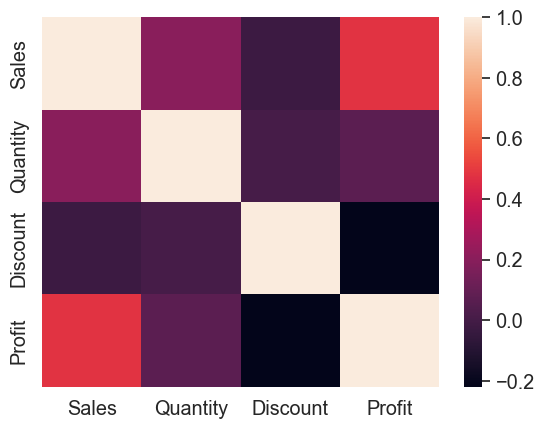

In [17]:
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr());

Поскольку коэффициент корреляции Пирсона не учитывет нелинейные связи, воспользуемся коэффициентом phik

In [19]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['Sales', 'Quantity', 'Discount', 'Profit']


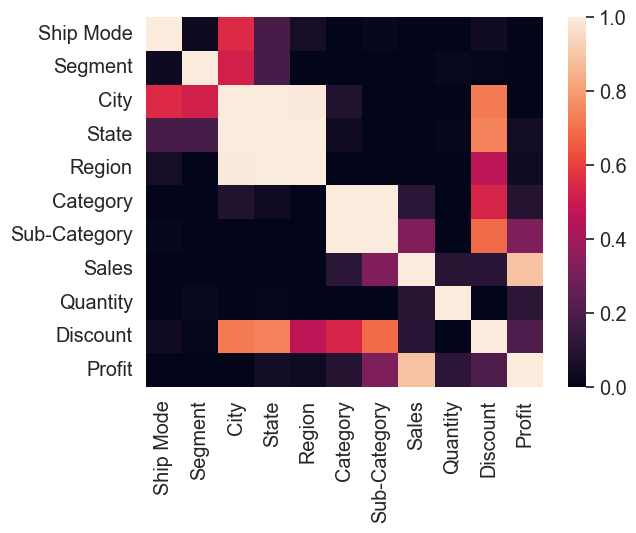

In [20]:
phik_overview = df.phik_matrix()
sns.heatmap(phik_overview);

In [21]:
#пример рассчета коэф-та корреляции для прибыли
phik_overview['Profit'].sort_values(ascending=False)

Profit          1.000000
Sales           0.893350
Sub-Category    0.319961
Discount        0.206807
Quantity        0.115765
Category        0.095189
State           0.050080
Region          0.035216
Ship Mode       0.007750
Segment         0.000000
City            0.000000
Name: Profit, dtype: float64

Данный коэффициент не отражает реальные причинно/следственные связи, но помогает начать анализ данных.

<h2>Общие продажи и прибыль:</h2>

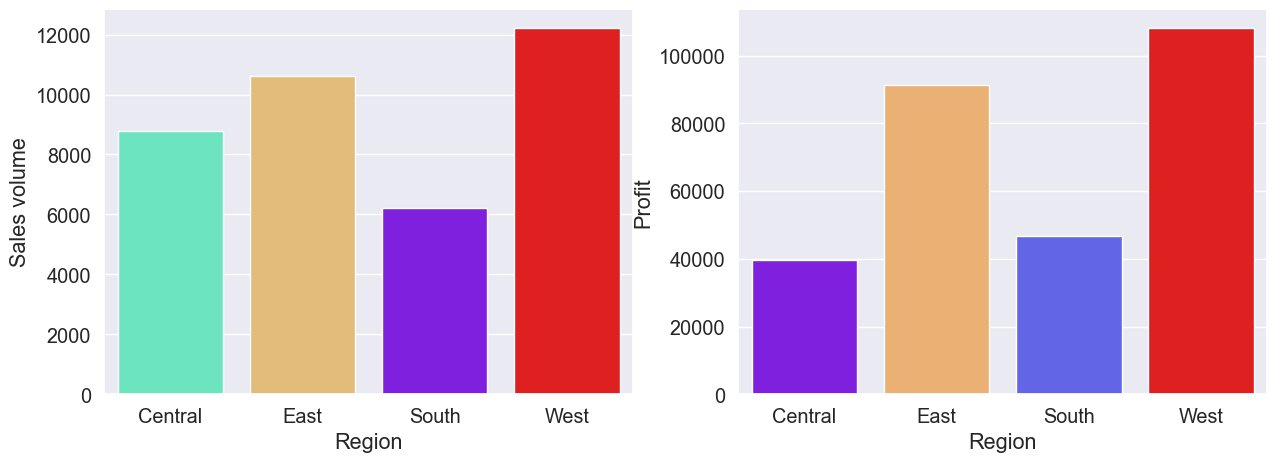

In [24]:
t1 = pd.DataFrame(df.groupby('Region')['Quantity'].sum().rename('Sales volume'))
t2 = pd.DataFrame(df.groupby('Region')['Profit'].sum())

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data = t1, x = 'Region', y = 'Sales volume', 
            hue = 'Sales volume', palette = 'rainbow',  ax = ax[0], legend = False);
sns.barplot(data = t2, x = 'Region', y = 'Profit', 
            hue = 'Profit', palette = 'rainbow',  ax = ax[1],  legend = False);
plt.show()

Видно, что наиболее прибыльным регионом является западный. Там же реализуется самый большой объем товаров

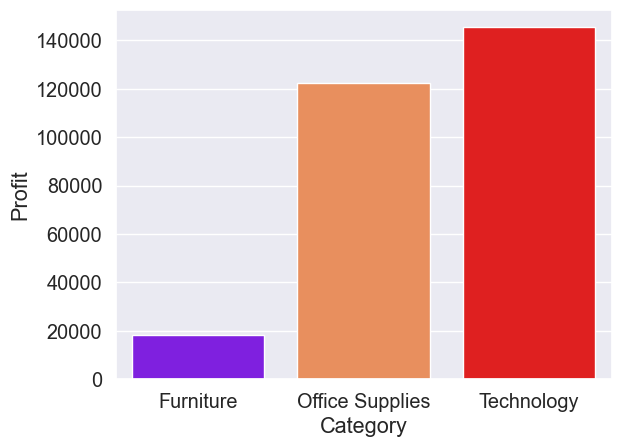

In [26]:
t = pd.DataFrame(df.groupby('Category')['Profit'].sum())
sns.barplot(data = t, x = 'Category', y = 'Profit', hue = 'Profit', palette = 'rainbow', legend = False);

Категория с техникой оказалась самой прибыльной из всех

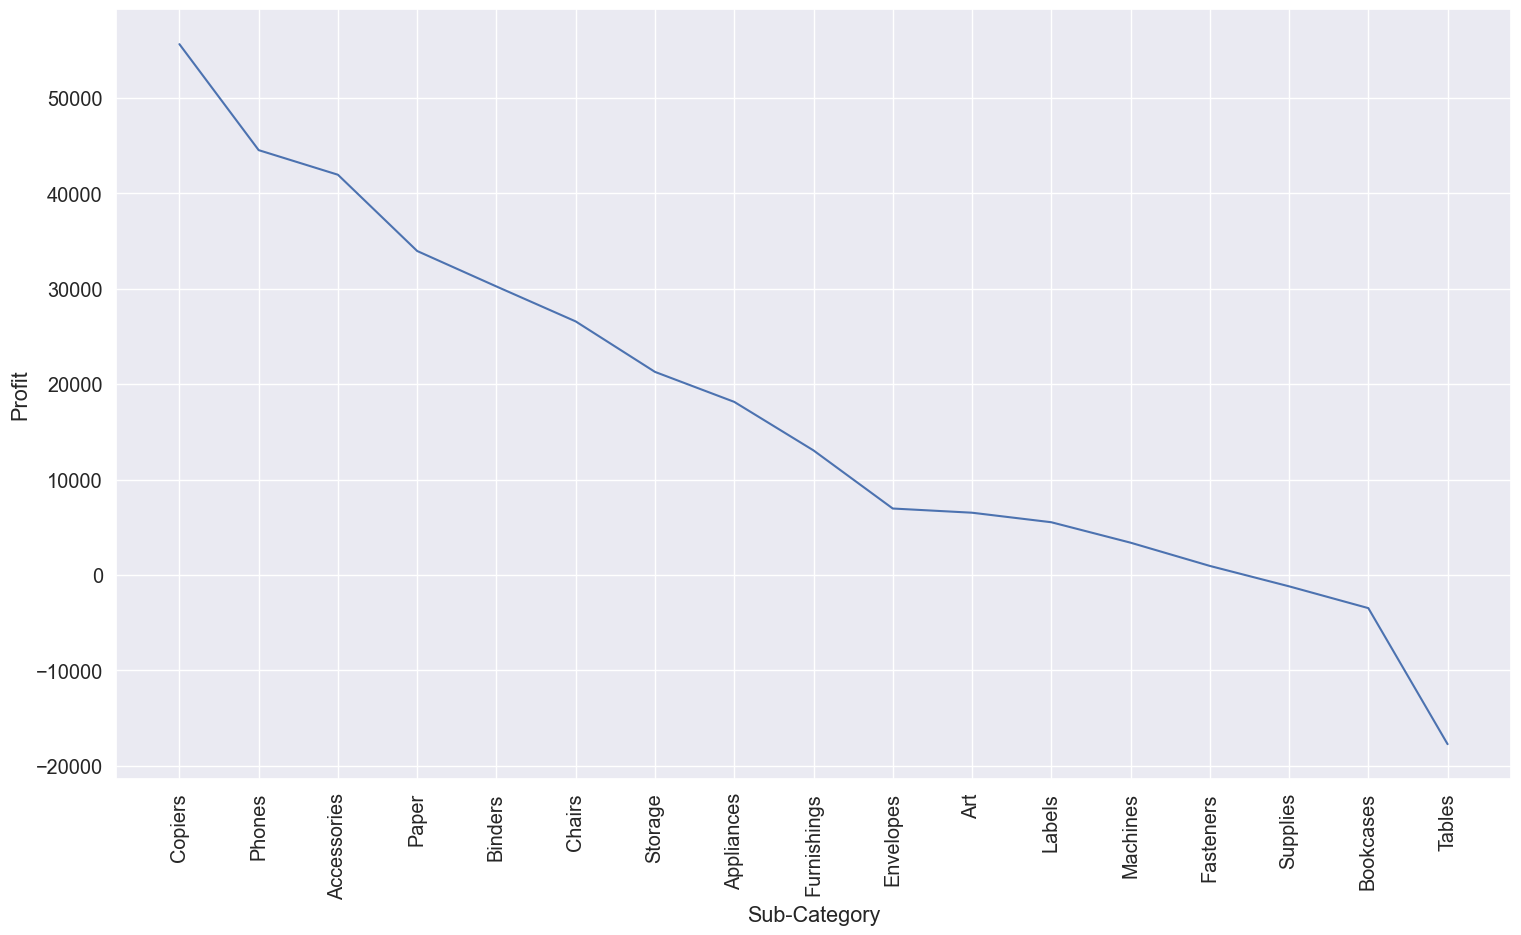

In [28]:
t = pd.DataFrame(df.groupby('Sub-Category')['Profit'].sum()).sort_values(by = 'Profit', ascending = False)
plt.figure(figsize=(18,10))
plt.xticks(rotation=90);
sns.lineplot(data = t, x = 'Sub-Category', y = 'Profit');

Ксеорксы и мобильные телефоны с аксессуарами приносят больше всего прибыли для компании, а продажа столов несет серьезные убытки. На данном этапе можно выдвинуть гипотезу о том, что уменьшение продаж столов приведет к росту прибыли компании.

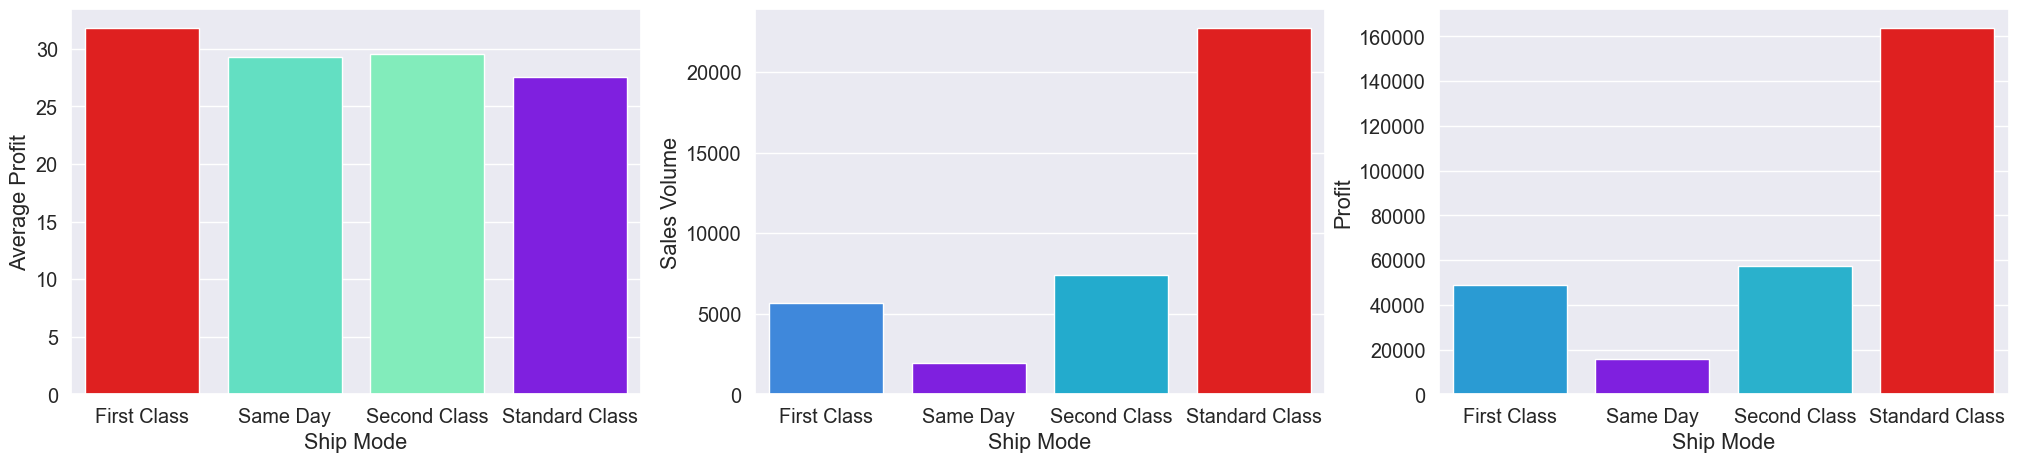

In [30]:
t1 = pd.DataFrame(df.groupby(['Ship Mode'])['Profit'].mean().rename('Average Profit'))
t2 = pd.DataFrame(df.groupby(['Ship Mode'])['Quantity'].sum().rename('Sales Volume'))
t3 = pd.DataFrame(df.groupby(['Ship Mode'])['Profit'].sum().rename('Profit'))

fig, ax = plt.subplots(1, 3, figsize = (25, 5))
sns.barplot(data = t1, x = 'Ship Mode', y = 'Average Profit', hue = 'Average Profit', palette = 'rainbow', legend = False, ax = ax[0]);
sns.barplot(data = t2, x = 'Ship Mode', y = 'Sales Volume', hue = 'Sales Volume', palette = 'rainbow', legend = False, ax = ax[1]);
sns.barplot(data = t3, x = 'Ship Mode', y = 'Profit', hue = 'Profit', palette = 'rainbow', legend = False, ax = ax[2]);

Видно, что в среднем заказы, отправленные разными классами доставки, не сильно отличаются по прибыли друг от друга.

Однако, количество товаров, отправленных обычным классом доставки, гораздо больше, чем остальных, что, в свою очередь, приводит к тому, что прибыль от товаров, отправленной стандартной доставкой наибольшая.

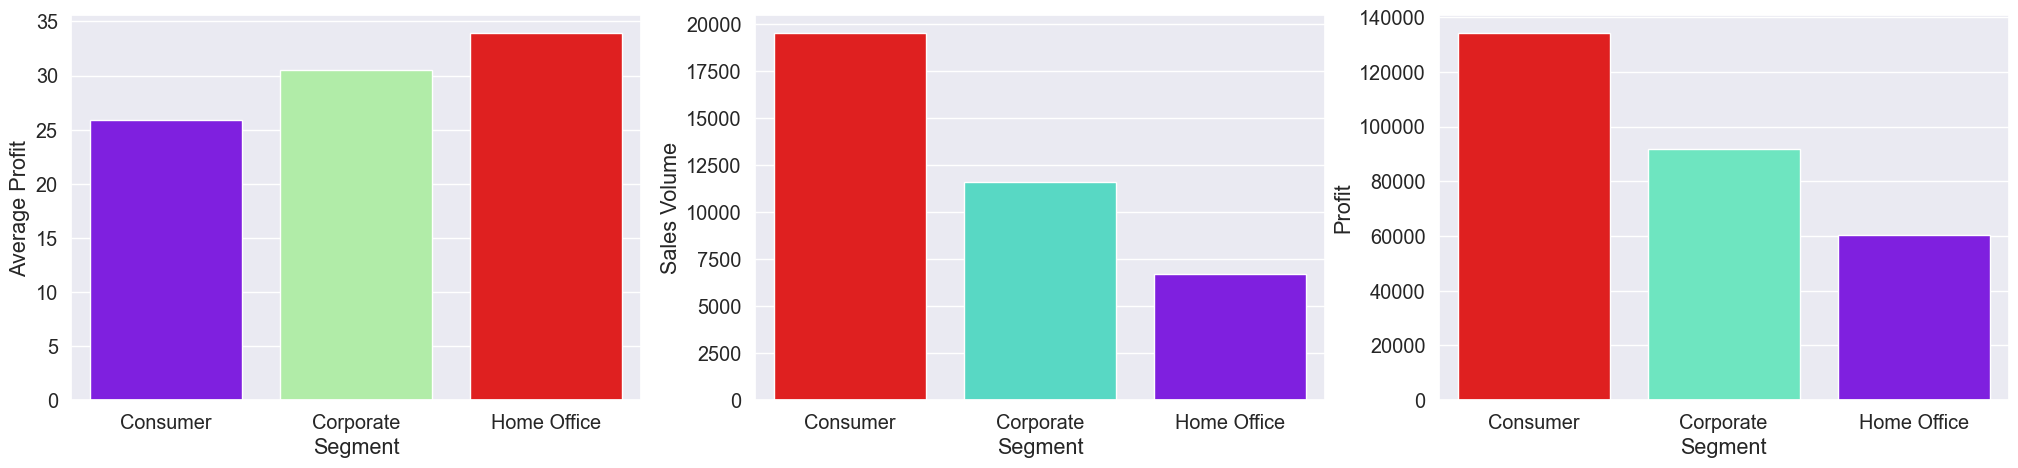

In [32]:
t1 = pd.DataFrame(df.groupby(['Segment'])['Profit'].mean().rename('Average Profit'))
t2 = pd.DataFrame(df.groupby(['Segment'])['Quantity'].sum().rename('Sales Volume'))
t3 = pd.DataFrame(df.groupby(['Segment'])['Profit'].sum().rename('Profit'))

fig, ax = plt.subplots(1, 3, figsize = (25, 5))
sns.barplot(data = t1, x = 'Segment', y = 'Average Profit', hue = 'Average Profit', palette = 'rainbow', legend = False, ax = ax[0]);
sns.barplot(data = t2, x = 'Segment', y = 'Sales Volume', hue = 'Sales Volume', palette = 'rainbow', legend = False, ax = ax[1]);
sns.barplot(data = t3, x = 'Segment', y = 'Profit', hue = 'Profit', palette = 'rainbow', legend = False, ax = ax[2]);

Средняя выручка от покупателя ниже, чем от крупных или мелких компаний, однако на обычного покупателя приходится наибольшая доля реализуемых товаров, за счет чего с них магазин получает больше всего прибыли.

<h2>Анализ клиентов</h2>

In [35]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


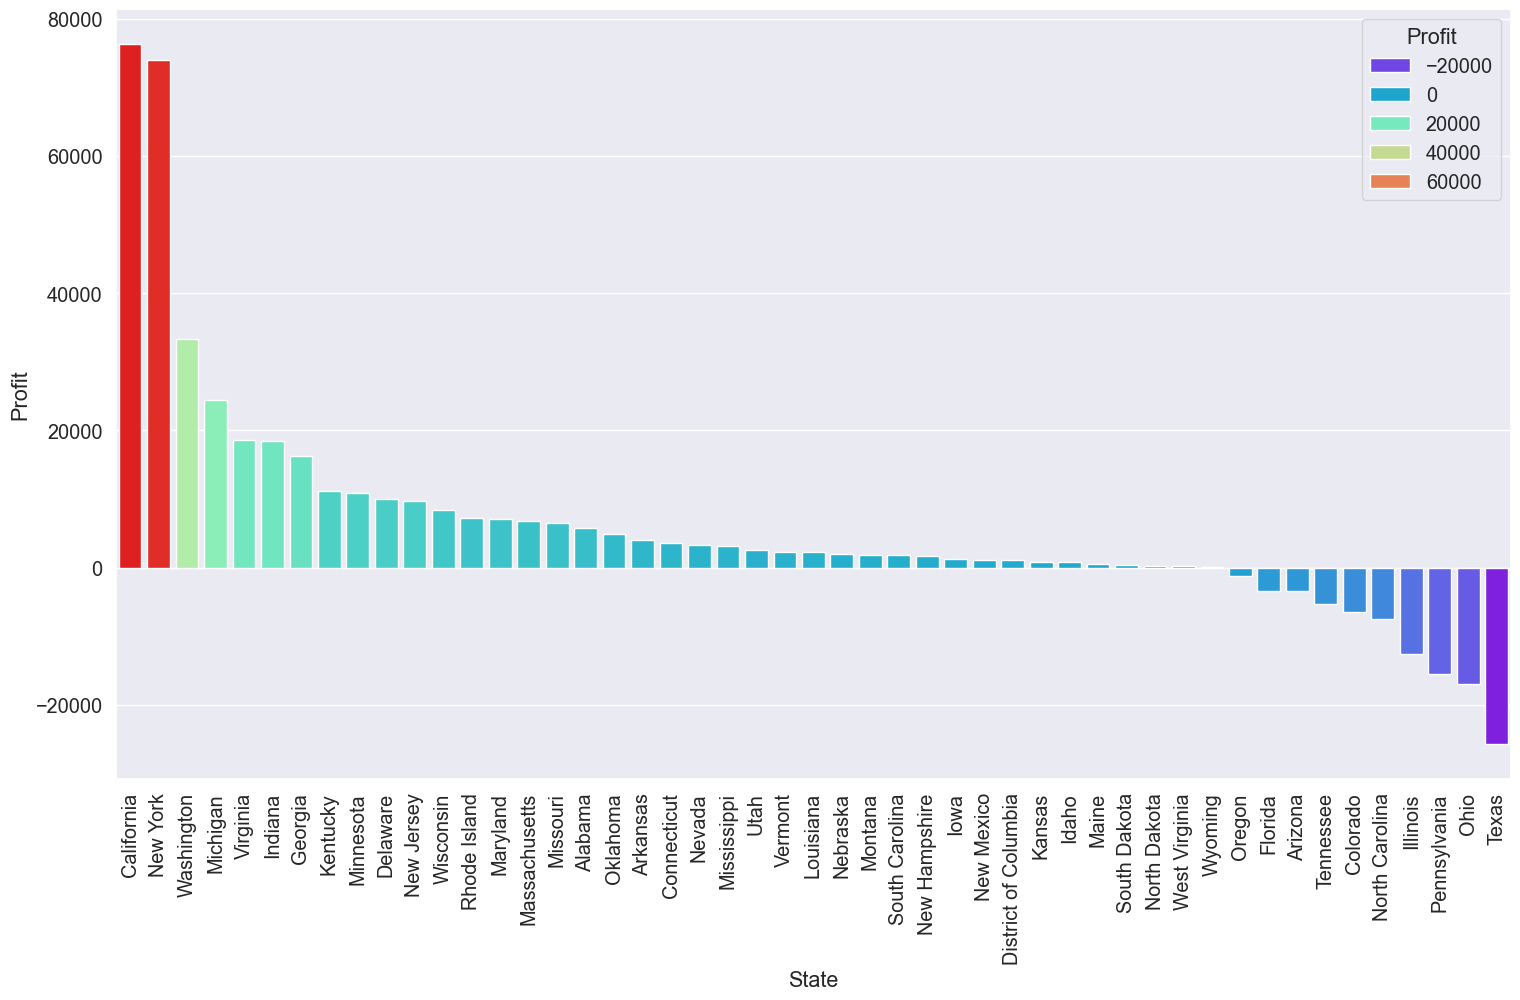

In [36]:
t1 = pd.DataFrame(df.groupby('State')['Profit'].sum()).sort_values(by='Profit', ascending=False)
plt.figure(figsize=(18,10))
plt.xticks(rotation=90);
sns.barplot(data = t1, x = 'State', y = 'Profit', hue = 'Profit', palette = 'rainbow');

Из диаграммы явно прослеживаются проблемные штаты, которые не приносят компании прибыли.

Построим теперь процентное соотношение прибыли по штатам

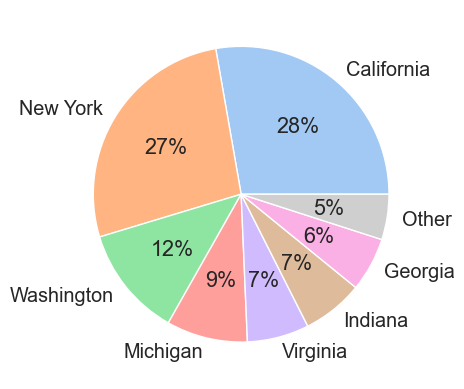

In [39]:
profit_by_state = df.groupby('State')['Profit'].sum()

total_profit = df['Profit'].sum()

percent_profit = (profit_by_state / total_profit * 100).round(2)

t = percent_profit.rename('Percent_of_Profit').reset_index()
t = t.sort_values(by = 'Percent_of_Profit', ascending=False, ignore_index=True)
t = t.head(8)
t.index += 1

t.loc[8] = ['Other', 100 - t['Percent_of_Profit'].sum()]
plt.pie(data = t, x = 'Percent_of_Profit', labels = t['State'], colors = sns.color_palette('pastel')[0:8], autopct = '%.0f%%');

In [40]:
t = df.groupby(['Segment', 'Ship Mode'])['Ship Mode'].count().rename('Count_of_del')
t = t.reset_index()
t

,Segment,Ship Mode,Count_of_del
0,Consumer,First Class,768
1,Consumer,Same Day,317
2,Consumer,Second Class,1019
3,Consumer,Standard Class,3079
4,Corporate,First Class,485
5,Corporate,Same Day,114
6,Corporate,Second Class,608
7,Corporate,Standard Class,1808
8,Home Office,First Class,284
9,Home Office,Same Day,111


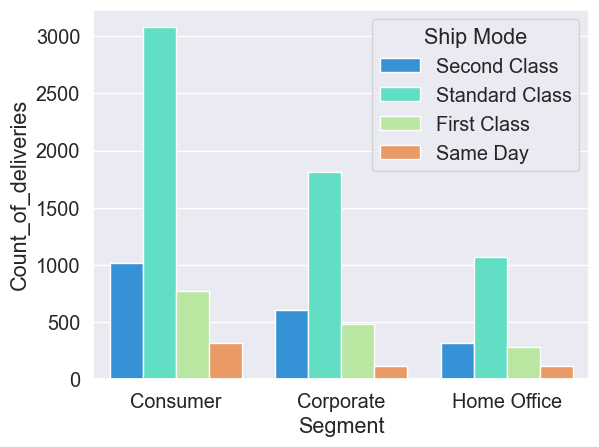

In [41]:
plt.ylabel('Count_of_deliveries')
sns.countplot(x = 'Segment', hue = 'Ship Mode', palette = 'rainbow', data = df);

Все сегменты покупателей предпочитают стандартную доставку другим.

<h2>Анализ товаров</h2>

In [238]:
t = pd.DataFrame(df.groupby(['Region','Sub-Category'])['Quantity'].sum().rename('Count '))
t = pd.DataFrame(t['Count'].groupby('Region', group_keys=False).nlargest(5))
t

Count
Region  Sub-Category       
Central Binders        1470
        Paper          1219
        Furnishings     758
        Storage         724
        Accessories     716
East    Binders        1652
        Paper          1393
        Furnishings    1015
        Phones          982
        Storage         907
South   Binders         981
        Paper           851
        Furnishings     615
        Art             547
        Phones          526
West    Binders        1868
        Paper          1681
        Furnishings    1172
        Phones         1068
        Storage        1039

Все доставленные товары в таблице были реализованы в магазинах, а значит мы получили таблицу с топ-5 продаваемыми товарами в каждом из регионов.

Чаще всего люди покупают материалы для вязания, бумагу и предметы интерьера вне зависимости от местоположения магазина.

In [275]:
t = df.groupby('Category')['Sales'].sum() / df.groupby('Category')['Quantity'].sum()
t.sort_values(ascending=False)

Category
Technology         120.500653
Furniture           92.432084
Office Supplies     31.439362
dtype: float64

Как и ожидалось, товары из категории "Технологии" в среднем дороже товаров из остальных категорий.